In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Load your dataset
data = pd.read_csv('Sales_data.csv')

# Display the first few rows
data.head()

,Make,Type,Model Type,Model,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total,Year
0,Hyundai,Domestic,PC,Accent (RB),0,0,0,0,0,0,0,0,0,0,0,0,0.0,2020
1,Hyundai,Domestic,PC,Avante (AD),2638,2575,3886,802,413,31,1,0,0,0,0,0,10346.0,2020
2,Hyundai,Domestic,PC,Avante (CN7),0,0,0,7447,8969,10844,11036,5751,8241,7454,6713,7605,74060.0,2020
3,Hyundai,Domestic,PC,Avante (CN7 HEV),0,0,0,0,0,0,0,41,895,862,764,763,3325.0,2020
4,Hyundai,Domestic,PC,IONIQ (AE HEV),162,83,393,421,97,127,87,75,67,131,419,10,2072.0,2020


In [3]:
# Handle NaN values (e.g., drop or fill them)
data = data.dropna()  # or use data.fillna(value)

# Optional: Remove outliers based on a threshold
some_threshold = data['Total'].quantile(0.95)  # Example threshold
filtered_data = data[data['Total'] < some_threshold]

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming filtered_data is already defined from your Streamlit app

# Define features (X) and target variable (y)
X = filtered_data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
y = filtered_data['Total']  # Target variable

# Check for NaN values and handle them
if X.isnull().values.any() or y.isnull().values.any():
    # You might want to fill NaNs with zeros or drop the rows
    X.fillna(0, inplace=True)  # or you could use X.dropna(inplace=True)
    y.dropna(inplace=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Check the shapes of your data
print("X shape:", X_scaled.shape)
print("y shape:", y.shape)

X shape: (417, 12)
y shape: (417,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose and fit your model (for example, Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)  # Mean Squared Error
r2 = r2_score(y_test, predictions)              # R-squared value

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Display predictions vs actual values
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(predicted_df)


Mean Squared Error: 1.6294473328470178e-22
R-squared: 1.0
      Actual  Predicted
165   6975.0     6975.0
422  33629.0    33629.0
437  11840.0    11840.0
103   8466.0     8466.0
78    6612.0     6612.0
..       ...        ...
25    8066.0     8066.0
18    7910.0     7910.0
74    8378.0     8378.0
181  44479.0    44479.0
33   34217.0    34217.0

[84 rows x 2 columns]


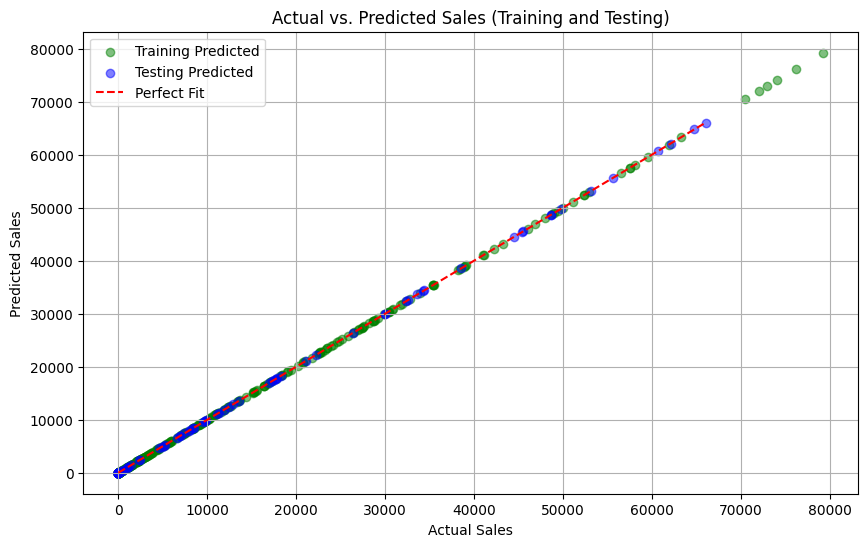

In [8]:
import matplotlib.pyplot as plt

# Predicting on training set
train_predictions = model.predict(X_train)

# Plotting Actual vs Predicted for Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='green', label='Training Predicted', alpha=0.5)
plt.scatter(y_test, predictions, color='blue', label='Testing Predicted', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Training and Testing)')
plt.legend()
plt.grid()
plt.show()


In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Choose and fit your model (for example, Linear Regression)
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive
mse_scores = -cv_scores

# Print the mean and standard deviation of the MSE from cross-validation
print(f"Mean MSE from cross-validation: {np.mean(mse_scores)}")
print(f"Standard deviation of MSE: {np.std(mse_scores)}")

Mean MSE from cross-validation: 2.053260651840291e-22
Standard deviation of MSE: 1.2680224827349674e-22


In [ ]:
# Splitting your original dataset into training, validation, and test sets
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame with features and target variable
X = data.drop('Total', axis=1)  # Features
y = data['Total']                # Target

# First split into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now split the training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Fit your model on the training set
model.fit(X_train, y_train)

# Evaluate on the validation set
val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)

print(f"Validation Mean Squared Error: {val_mse}")
print(f"Validation R-squared: {val_r2}")

# Finally, evaluate on the test set
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Test Mean Squared Error: {test_mse}")
print(f"Test R-squared: {test_r2}")